In [16]:
# Install the Gemini API Python client
!pip install -q google-generativeai pandas seaborn


In [17]:
import google.generativeai as genai
from google.colab import userdata
import pandas as pd
import seaborn as sns
import random
import time

# Configure the Gemini API key
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

print("Libraries imported and API configured.")


Libraries imported and API configured.


In [18]:
# Define the dataset for training
training_data = [
    {'text_input': 'Roll number 1', 'output': 'Name: John, Age: 20, Course: Physics'},
    {'text_input': 'Roll number 2', 'output': 'Name: Alice, Age: 22, Course: Chemistry'},
    {'text_input': 'Roll number 3', 'output': 'Name: Bob, Age: 19, Course: Mathematics'},
    {'text_input': 'Roll number 4', 'output': 'Name: Emma, Age: 21, Course: Biology'},
    {'text_input': 'Roll number 5', 'output': 'Name: Lily, Age: 23, Course: Computer Science'},
]

print("Training dataset created.")


Training dataset created.


In [19]:
# Select the base model
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name
][0]
print("Base model selected:", base_model.name)


Base model selected: models/gemini-1.5-flash-001-tuning


In [20]:
# Define a unique name for the tuned model
model_name = f'student-model-{random.randint(0, 10000)}'

# Start the tuning process
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=training_data,
    id=model_name,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001
)

print("Tuning job started. Model name:", model_name)


Tuning job started. Model name: student-model-7257


In [21]:
# Check the tuning progress
print("Checking tuning progress...")
for status in operation.wait_bar():
    time.sleep(30)

# Fetch the trained model
model = operation.result()
print("Tuning complete. Model is ready!")


Checking tuning progress...


  0%|          | 0/125 [00:00<?, ?it/s]

Tuning complete. Model is ready!


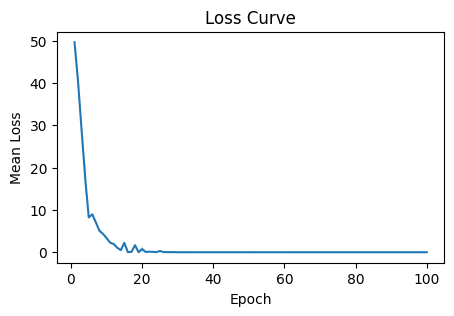

Loss curve displayed with adjusted size.


In [26]:
import matplotlib.pyplot as plt

# Visualize the loss curve with smaller size
plt.figure(figsize=(5, 3))  # Adjust the figure size (width=8, height=4)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Mean Loss")
plt.show()

print("Loss curve displayed with adjusted size.")


In [27]:
# Load the tuned model
student_model = genai.GenerativeModel(model_name=f'tunedModels/{model_name}')

# Test the model with various roll numbers
inputs = [
    'Roll number 1',
    'Roll number 2',
    'Roll number 3',
    'Roll number 4',
    'Roll number 5'
]

# Generate outputs for each input
for input_text in inputs:
    result = student_model.generate_content(input_text)
    print(f"Input: {input_text} => Output: {result.text}")


Input: Roll number 1 => Output: Name: John, Age: 20, Course: Physics
Input: Roll number 2 => Output: Alice, 22, Chemistry
Input: Roll number 3 => Output: Bob, Emma, Chemistry
Input: Roll number 4 => Output: Name: Emma, Course: Biology
Input: Roll number 5 => Output: Lily, Chemistry


In [28]:
# Update the model description
genai.update_tuned_model(f'tunedModels/{model_name}', {"description": "Tuned model for student details retrieval"})
model = genai.get_tuned_model(f'tunedModels/{model_name}')
print("Updated description:", model.description)


Updated description: Tuned model for student details retrieval
